# 기계학습및실습 2024-2학기 중간과제

## 타이타닉 데이터셋 분석

인공지능융합학부 정다빈(2021100924)

* ## 데이터 불러오기

In [93]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./data/train.csv" , index_col="PassengerId" )
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape

(891, 12)

In [43]:
df.tail()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


* ## 기초 데이터 분석

등급 별 승객 수

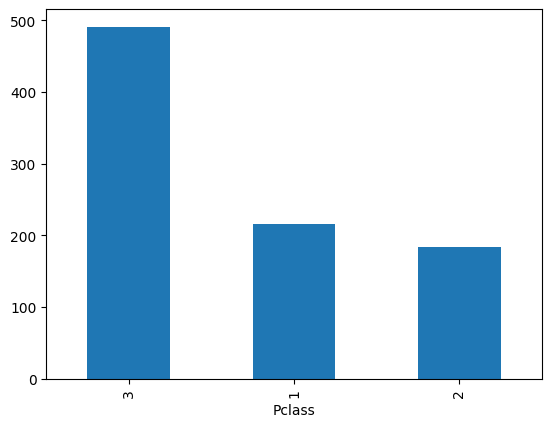

In [48]:
df["Pclass"].value_counts().plot( kind="bar", x="Pclass")
plt.show()

In [49]:
test_df = pd.read_csv("./data/train.csv" , index_col="PassengerId" )
test_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* ## 타이타닉에서 살아남을 수 있는 승객 예측

### 1. 등석별 생존율

1등석에 있던 승객들은 사망한 사람보다 생존한 사람이 많고, 반면 3등석은 생존한 사람보다 사망한 사람이 훨씬 많습니다.
사회적 계층의 차이가 위기상황에서 생존에 영향을 미쳤을 수 있습니다.

In [52]:
def chart(dataset, feature):
    survived = dataset[dataset['Survived'] == 1][feature].value_counts()
    dead = dataset[dataset['Survived'] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True)

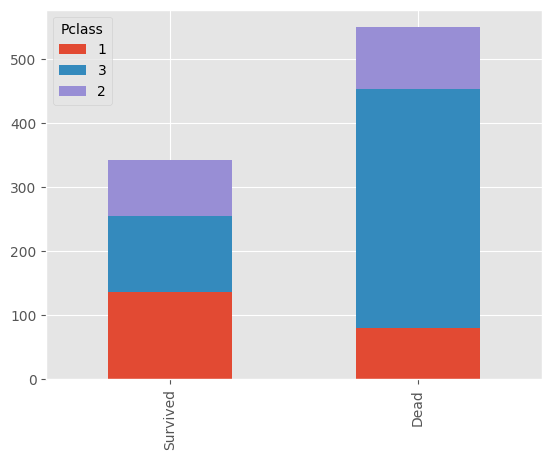

In [67]:
chart(df , 'Pclass')

구조 우선순위가 경제적 배경에 따라 달랐을 가능성을 추정해 볼 수 있습니다.

### 2. 성별에 따른 생존율

여성은 생존률이 매우 높은 반면, 남성은 사망한 사람이 훨씬 많다는 것을 관측할 수 있습니다. 사고 당시에 남성보다는 여성을 우선적으로 살리는 '레이디 퍼스트'개념이 적용되었음을 반영할 수 있습니다.

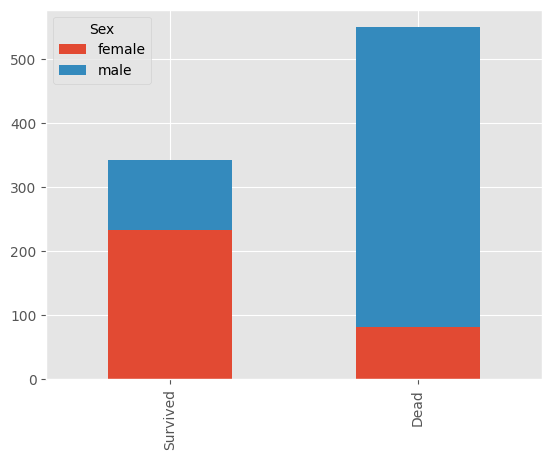

In [72]:
chart( df , 'Sex')

### 3. 연령대에 따른 생존율

표를 확인해보면 유아와 30,50대의 생존자 수가 많은 것을 볼 수 있습니다.

In [110]:
df[['Ageband','Survived']].groupby('Ageband',as_index=False).mean()

,Ageband,Survived
0,유아,0.591549
1,청소년,0.370370
2,20대,0.365217
3,30대,0.445161
4,40대,0.383721
5,50대,0.404762
6,60대,0.235294
7,70대,0.200000


아이들도 여성들과 함께 위기상황에 가장 먼저 구조를 했다는 것을 알 수 있으며,
청소년과 20대의 생존율이 낮은 것을 보았을 때, 나이가 성별과 객실등급에 비해서 생존율에 영향을 크게 미치진 않는다는 것을 알 수 있습니다.